Phase 1: Become a Data Explorer!

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('diabetes.csv')

sns.set(style="whitegrid")

/tmp/ipython-input-2870186109.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set2')


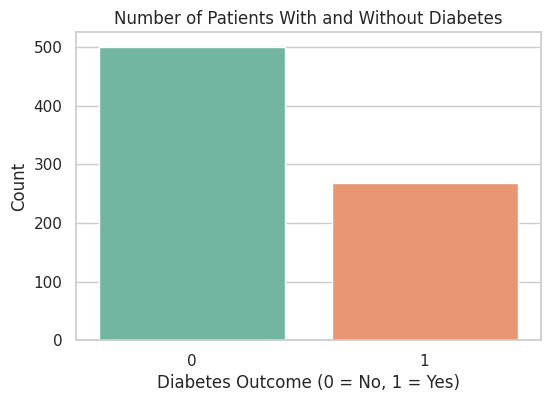

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df, palette='Set2')
plt.title('Number of Patients With and Without Diabetes')
plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-2004290051.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Glucose', data=df, palette='Set3')


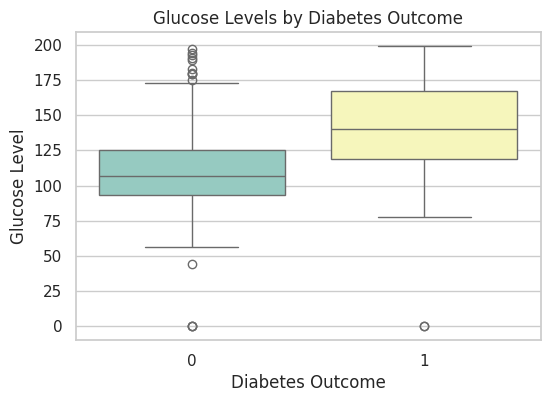

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Outcome', y='Glucose', data=df, palette='Set3')
plt.title('Glucose Levels by Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Glucose Level')
plt.show()

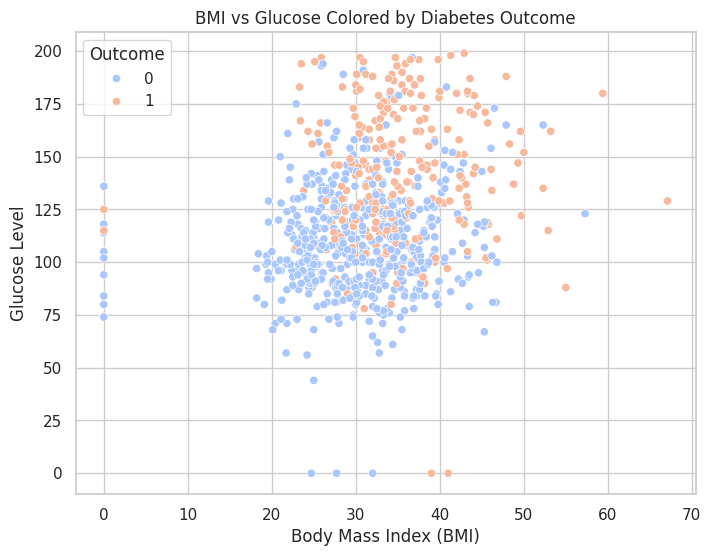

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='BMI', y='Glucose', hue='Outcome', data=df, palette='coolwarm')
plt.title('BMI vs Glucose Colored by Diabetes Outcome')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Glucose Level')
plt.show()

In [11]:
print("Summary Statistics for Glucose and BMI:")
print(df[['Glucose', 'BMI']].describe())

print("\nDiabetes Outcome Counts:")
print(df['Outcome'].value_counts())

Summary Statistics for Glucose and BMI:
          Glucose         BMI
count  768.000000  768.000000
mean   120.894531   31.992578
std     31.972618    7.884160
min      0.000000    0.000000
25%     99.000000   27.300000
50%    117.000000   32.000000
75%    140.250000   36.600000
max    199.000000   67.100000

Diabetes Outcome Counts:
Outcome
0    500
1    268
Name: count, dtype: int64


Phase 2: Prep Your Data for Prime Time

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('diabetes.csv')

In [14]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training features shape: (614, 8)
Testing features shape: (154, 8)
Training labels shape: (614,)
Testing labels shape: (154,)


Phase 3: Build, Train and Compete!

In [16]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load dataset
df = pd.read_csv('diabetes.csv')

In [17]:
# Features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
# Logistic Regression with GridSearchCV
log_reg = LogisticRegression(max_iter=1000)
log_params = {'C': [0.01, 0.1, 1, 10, 100]}
log_grid = GridSearchCV(log_reg, log_params, cv=5)
log_grid.fit(X_train, y_train)
log_best = log_grid.best_estimator_

In [19]:
# Random Forest with GridSearchCV
rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

In [20]:
# Evaluate models
models = {'Logistic Regression': log_best, 'Random Forest': rf_best}
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n{name} Results:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print("Confusion Matrix:\n", cm)

# Best parameters
print("\nBest Parameters:")
print("Logistic Regression:", log_grid.best_params_)
print("Random Forest:", rf_grid.best_params_)


Logistic Regression Results:
Accuracy: 0.7532
Precision: 0.6491
Recall: 0.6727
Confusion Matrix:
 [[79 20]
 [18 37]]

Random Forest Results:
Accuracy: 0.7143
Precision: 0.5932
Recall: 0.6364
Confusion Matrix:
 [[75 24]
 [20 35]]

Best Parameters:
Logistic Regression: {'C': 10}
Random Forest: {'max_depth': None, 'n_estimators': 50}


Phase 4: Launch Your Prediction Engine!

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('diabetes.csv')

X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
# Define prediction function
def predict_diabetes(input_data):
    """
    input_data: list or array of 8 values in the following order:
    [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
    """
    input_df = pd.DataFrame([input_data], columns=X.columns)
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)
    result = 'Diabetic' if prediction[0] == 1 else 'Non-Diabetic'
    return result

# Example usage
new_patient = [2, 120, 70, 30, 100, 32.5, 0.5, 25]
print("Prediction for new patient:", predict_diabetes(new_patient))

Prediction for new patient: Non-Diabetic
